In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lazyfit

# Lorentzian

In [3]:
# data parameters
A = 500 # amplitude
x0 = 1 # peak location
B = 100 # background 
FWHM = 2 # FWHM

# generat data
x = np.linspace(-10, 10, 50)
y = lazyfit.models.lorentz.f(x, A, x0, FWHM, B)
y_noise = np.random.poisson(lam=y)

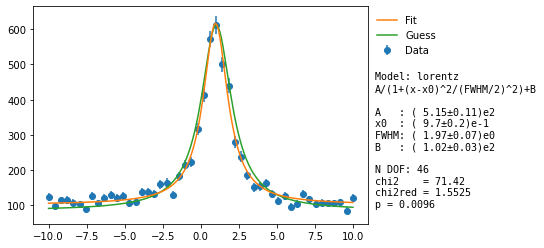

In [4]:
# fit
fit_lorentz = lazyfit.fit('lorentz', x, y_noise, dy=np.sqrt(y_noise))
fit_lorentz.plot(N=200, plot_guess = True);

# Gaussian

In [5]:
# data parameters
A = 500 # amplitude
x0 = 1 # peak location
s = 1 # standard deviation
B = 100 # background

# generate data
x = np.linspace(-10, 10, 50)
y = lazyfit.models.gaussian.f(x, A, x0, s, B)
y_noise = np.random.poisson(lam=y)

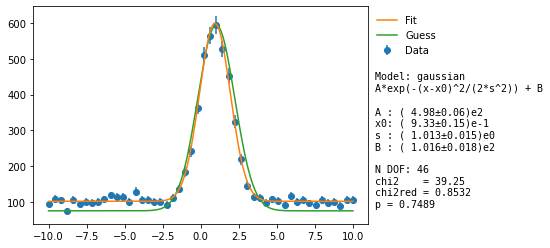

In [6]:
fit_gauss = lazyfit.fit('gaussian', x, y_noise, dy=np.sqrt(y_noise))
fit_gauss.plot(N=200, plot_guess = True);

# Normalised gaussian

This is the same as the Gaussian above except the peak amplitude is replaced by the area below the Gaussian

In [7]:
# data parameters
area = 1000 # area
x0 = 1 # peak location
s = 1 # standard deviation

# generate data
x = np.linspace(-10, 10, 50)
y = lazyfit.models.normgaussian.f(x, area, x0, s)
y_noise = np.random.poisson(lam=y)

C:\Dropbox\Programming\Python\lazyfit\wrapper.py:106: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum((self.y - self.predict(self.x)) ** 2 / self.dy ** 2)


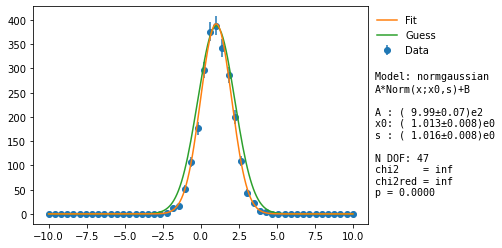

In [8]:
fit_gauss = lazyfit.fit('normgaussian', x, y_noise, dy=np.sqrt(y_noise))
fit_gauss.plot(N=200, plot_guess = True);

# Voigt

In [9]:
# data parameters
A = 1000 # peak amplitude
x0 = 0 # peak location
L = 1 # lorentzian FWHM
G = 2 # Gaussian FWHM
B = 100 # background

# generate data
x = np.linspace(-5 ,5 , 100)
y = lazyfit.models.voigt.f(x, A, x0, L, G, B )
y_noise = np.random.poisson(lam=y)

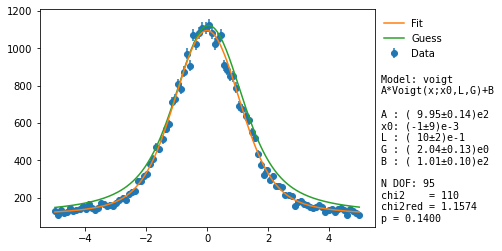

In [10]:
fit_voigt = lazyfit.fit('voigt', x, y_noise, dy=np.sqrt(y_noise))
fit_voigt.plot(N=200, plot_guess = True);

Calculate the total FWHM:

In [11]:
lazyfit.utility.get_voigt_FWHM(fit_voigt.params_dict['G'], fit_voigt.params_dict['L'] )

2.6216950246856268

# Exponential decay

In [12]:
# test data parameters
A = 2000 # amplitude at t=0
gamma = 1 # decay rate
B = 10 # background

# generate test data
x = np.linspace(0,10,500)
y = lazyfit.models.exp.f(x, A, gamma, B)
y_noise = np.random.poisson(lam=y)

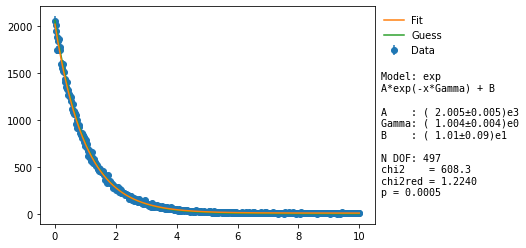

In [13]:
fit_exp = lazyfit.fit('exp', x, y_noise, dy = np.sqrt(y_noise))
fig = fit_exp.plot(plot_guess = True)

Here it can be usefull to enable the logarithmic y axis and to plot the residuals

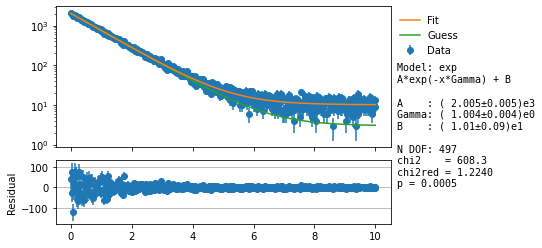

In [14]:
fig = fit_exp.plot(plot_guess = True, logy = True, plot_residuals=True)

# Biexponential decay

In [15]:
# test data parameters
A1 = 2000 # amplitude at t=0
gamma1 = 1 # decay rate
A2 = 500 # amplitude at t=0
gamma2 = 0.1 # decay rate
B = 0 # background

# generate test data
x = np.linspace(0,10,500)
y = lazyfit.models.biexp.f(x, A1, gamma1, A2, gamma2, B)
y_noise = np.random.poisson(lam=y)

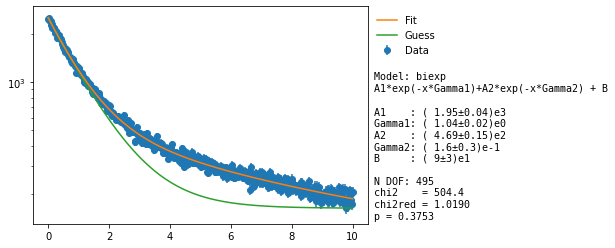

In [16]:
fit_biexp = lazyfit.fit('biexp', x, y_noise, dy = np.sqrt(y_noise))
fig = fit_biexp.plot(plot_guess = True, logy=True)

# Convolved exponential

In [17]:
# test data parameters
A = 2000 # amplitude at t=0
gamma = 1 # decay rate
B = 10 # background
x0 = 0 # start time of decay
s = 0.2 # instrument response standard deviation

# generate test data
x = np.linspace(-2,6,500)
y = lazyfit.models.convexp.f(x, A, gamma, B, x0, s)
y_noise = np.random.poisson(lam=y)

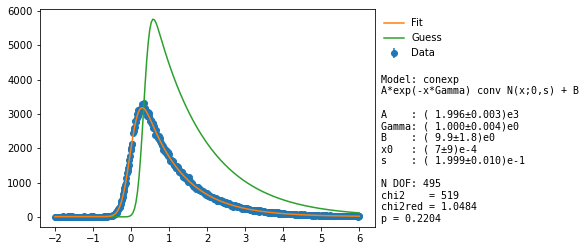

In [18]:
fit_convexp = lazyfit.fit('convexp', x, y_noise, dy = np.sqrt(y_noise))
fig = fit_convexp.plot(plot_guess = True)

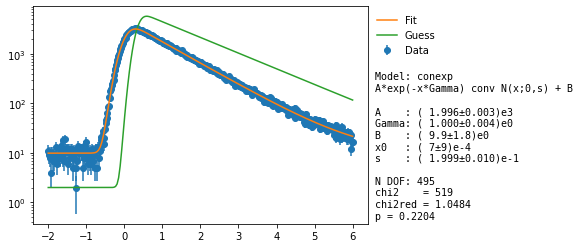

In [19]:
fig = fit_convexp.plot(plot_guess = True, logy = True)

# Sine

In [20]:
# test data parameters
A = 0.5
f = np.random.uniform(2, 4)
phi = np.random.uniform(0, 2*np.pi)
B = np.random.uniform(-3, 3)

# generate test data
x = np.linspace(0,2,100)
y = lazyfit.models.sin.f(x, A, f, phi, B)
y_noise = y + np.random.normal(scale=0.1, size=x.size)

In [21]:
fit_sin = lazyfit.fit('sin',x,y_noise, dy=0.1)
fig = fit_sin.plot(N=400, plot_guess=True)

NameError: name 'func_sin' is not defined

# Ramsey

In [ ]:
# test data parameters
A = 5
f = 2.35
phi = 0
B = 0
T2s = 5
alpha = 2

# generate test data
x = np.linspace(0, 10, 200)
y = lazyfit.models.ramsey.f(x, A, f, phi, B, T2s, alpha)
y_noise = y + np.random.normal(scale=0.1, size=x.size)

In [ ]:
fit_ramsey = lazyfit.fit('ramsey', x, y_noise, dy=0.1)
fig = fit_ramsey.plot(N=400, plot_guess=True)

# Rabi

In [ ]:
# test data parameters
A = 1000 # amplitude
B = 100 # background
x_pi = 0.5e-7 # pi pulse power

# generate test data
x = np.linspace(0, 2e-7, 30)
y = lazyfit.models.rabi.f(x, A, x_pi, B)
y_noise = np.random.poisson(lam=y)

In [ ]:
fit_rabi = lazyfit.fit('rabi', x, y_noise, dy=np.sqrt(y_noise))
fit_rabi.plot(N=200, plot_guess=True);

# Two-level saturation

In [ ]:
# test data parameters
Psat = 0.2e-5 # saturation power
Imax = 1000 # intensity at infinite power

# generate test data
x = np.linspace(0, 5*Psat, 30)
y = lazyfit.models.twolvlsat.f(x, Psat, Imax)
y_noise = np.random.poisson(lam=y)

In [ ]:
fit_twolvlsat = lazyfit.fit('twolvlsat', x, y_noise, dy=np.sqrt(y_noise))
fit_twolvlsat.plot(N=200, plot_guess=True);

# Linear

In [ ]:
# test data parameters
A = 5 # linear slope
B = 1 # y-intercept

# generate test data
x = np.linspace(-2,5,20)
y = lazyfit.models.lin.f(x, A, B)
y_noise = y + np.random.normal(scale = 1, size=y.size)

In [ ]:
fit_lin = lazyfit.fit('lin', x, y_noise, dy=1)
fit_lin.plot(N=200, plot_guess = True);

# Logistic rise

In [ ]:
# test data parameters
A = 1000 # amplitude
B = 100 # background
x0 = 0
k = 1

# generate test data
x = np.linspace(-10, 10, 30)
y = lazyfit.models.logistic.f(x, A, B, x0, k)
y_noise = np.random.poisson(lam=y)

In [ ]:
fit_logistic = lazyfit.fit('logistic', x, y_noise, dy=np.sqrt(y_noise))
fit_logistic.plot(N=200, plot_guess = True);

# Logistic pulse

In [ ]:
# test data parameters
A = 1000 # amplitude
B = 100 # background
x0 = -2 # turn  on 
x1 = 2 # turn off
k0 = 2
k1 = 5

# generate test data
x = np.linspace(-10, 10, 30)
y = lazyfit.models.logpulse.f(x, A, B, x0, x1, k0, k1)
y_noise = np.random.poisson(lam=y)

In [ ]:
fit_logpulse = lazyfit.fit('logpulse', x, y_noise, dy=np.sqrt(y_noise))
fit_logpulse.plot(N=200, plot_guess = True);